<img style="float: left;;" src='Figures/alinco.png' /></a>
# <center> <font color= #000047> Tratamiento de datos Faltantes </font> </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv('Data/API_SI.POV.DDAY_DS2.csv', encoding='latin-1', sep='\t')
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  264 non-null    object 
 2   1960          0 non-null      float64
 3   1961          0 non-null      float64
 4   1962          0 non-null      float64
 5   1963          0 non-null      float64
 6   1964          0 non-null      float64
 7   1965          0 non-null      float64
 8   1966          0 non-null      float64
 9   1967          1 non-null      float64
 10  1968          0 non-null      float64
 11  1969          1 non-null      float64
 12  1970          0 non-null      float64
 13  1971          1 non-null      float64
 14  1972          0 non-null      float64
 15  1973          0 non-null      float64
 16  1974          2 non-null      float64
 17  1975          2 non-null      float64
 18  1976          0 non-null      

# Visualización de datos faltantes

In [6]:
# Mapa de calor
dfcopy = df.copy()
dfcopy = dfcopy.isna()
dfcopy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3,False,False,True,True,True,True,True,True,True,True,...,True,False,True,False,False,False,False,True,True,True
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


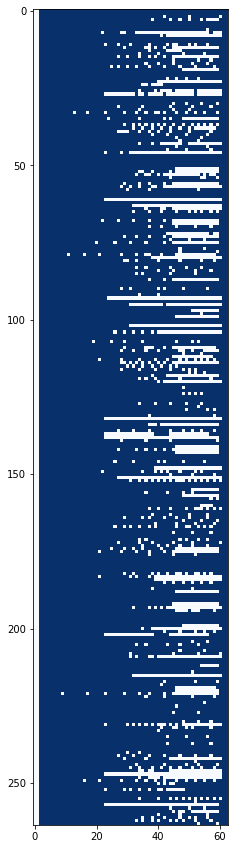

In [9]:
plt.figure(figsize=(5,15))
#plt.imshow(~dfcopy, cmap='Blues') #Enn blanco vamos a tener los datos perdidos
plt.imshow(dfcopy, cmap='Blues') #Enn azul vamos a tener los datos perdidos
plt.show()

In [10]:
# Matriz de co-ocurrencia
# 
# Suponemos una correlación entre las variables 'Argentina' (index 7) y 'Armenia' (index 8)
df.iloc[7]

Country Name    Argentina
Country Code          ARG
1960                  NaN
1961                  NaN
1962                  NaN
                  ...    
2016                  1.0
2017                  0.8
2018                  1.3
2019                  NaN
2020                  NaN
Name: 7, Length: 63, dtype: object

In [11]:
df.loc[8]

Country Name    Armenia
Country Code        ARM
1960                NaN
1961                NaN
1962                NaN
                 ...   
2016                1.2
2017                0.9
2018                1.4
2019                NaN
2020                NaN
Name: 8, Length: 63, dtype: object

In [12]:
df[df['Country Name']=='Argentina']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3,NaN,NaN


In [13]:
df[df['Country Name']=='Armenia']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4,NaN,NaN


In [15]:
dfNaN = df.copy()
dfNaN.fillna('NaN', inplace=True)
pd.crosstab(dfNaN.iloc[7], dfNaN.iloc[8])

8,0.9,1.0,1.2,1.3,1.4,1.5,1.6,1.8,2.1,2.7,5.5,7.9,10.5,12.2,14.4,ARM,Armenia,NaN
7,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Eliminación de datos

In [17]:
# Eliminación de filas (variables)
df.dropna()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [18]:
# Eliminación de columnas (observaciones)
df.dropna(axis=1) #df.dropna(axis=0)

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


In [19]:
df.dropna(axis=0)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [21]:
dfcopy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3,False,False,True,True,True,True,True,True,True,True,...,True,False,True,False,False,False,False,True,True,True
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [20]:
# Eliminando variables y observaciones sin datos
dfcopy.sum()

Country Name      0
Country Code      0
1960            264
1961            264
1962            264
               ... 
2016            176
2017            185
2018            227
2019            264
2020            264
Length: 63, dtype: int64

In [22]:
dfcopy.sum(axis=1)

0      61
1      61
2      58
3      52
4      61
       ..
259    49
260    58
261    54
262    52
263    59
Length: 264, dtype: int64

In [23]:
df1 = df.copy()
var, =np.where(dfcopy.sum()>263)
obs, =np.where(dfcopy.sum(axis=1)>60)

df1 = df.drop(index=obs, columns=df.columns[var])
df1.head()


,Country Name,Country Code,1967,1969,1971,1974,1975,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.8,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.0,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4


In [24]:
df1.shape

(179, 49)

In [26]:
df.shape

(264, 63)

In [28]:
def eliminacion_datos_faltantes(df, len_miss_obs, len_miss_var):
    dfcopy = df.copy()
    dfcopy = dfcopy.isna()
    df1 = df.copy()
    var, =np.where(dfcopy.sum()>len_miss_var)
    obs, =np.where(dfcopy.sum(axis=1)>len_miss_obs)

    df1 = df.drop(index=obs, columns=df.columns[var])
    return df1

In [29]:
df_drop = eliminacion_datos_faltantes(df,60,263)
df_drop

,Country Name,Country Code,1967,1969,1971,1974,1975,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.8,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.0,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2,2.5,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN
261,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.2,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65.8,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN


In [30]:
def heatMap_missingData(df):
    plt.figure(figsize=(5,15))
    #plt.imshow(~dfcopy, cmap='Blues') #Enn blanco vamos a tener los datos perdidos
    plt.imshow(dfcopy, cmap='Blues') #Enn azul vamos a tener los datos perdidos
    plt.title('HeatMap')
    plt.show()

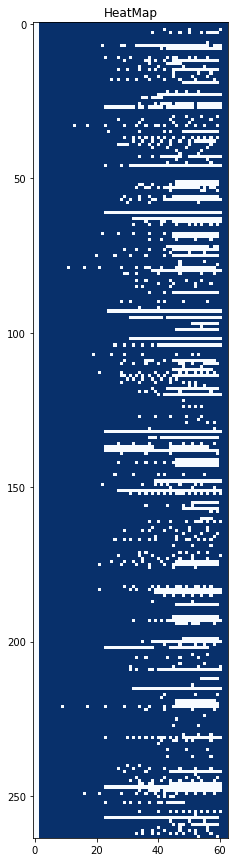

In [34]:
heatMap_missingData(df_drop)

In [36]:
#Ejemplo de un dataframe con datos generados aleatoriamente
df = pd.DataFrame(np.random.randn(100,4)+10*np.random.rand(4), columns=['A','B','C','D'])
df.head()

,A,B,C,D
0,6.532546,9.549583,7.875056,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,7.724380,3.976409
3,8.268089,7.456884,7.923330,3.154594
4,7.260166,9.770839,8.830825,3.591899


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       100 non-null    float64
 1   B       100 non-null    float64
 2   C       100 non-null    float64
 3   D       100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


In [38]:
for c in df.columns[:-1]:
    inan = np.random.randint(100, size=np.random.randint(20))
    df[c].iloc[inan] = np.NaN
    print(inan,c)

[66 20 97 47 76 17] A
[ 3 78  4 57  7 66] B
[56 51 49  0 46  6  7 75  2 38 64 63] C


In [39]:
df

,A,B,C,D
0,6.532546,9.549583,NaN,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,NaN,3.976409
3,8.268089,NaN,7.923330,3.154594
4,7.260166,NaN,8.830825,3.591899
...,...,...,...,...
95,8.418329,9.063539,9.675768,2.233205
96,6.241706,8.923434,8.632555,4.563871
97,NaN,7.504447,8.851266,2.358825
98,6.570675,7.387592,9.460362,1.974308


In [40]:
# Eliminación de filas (Observaciones)
df.dropna()

,A,B,C,D
1,6.983432,9.258164,9.594978,2.999163
5,7.154910,8.054926,9.300716,1.910635
8,6.871659,10.038643,7.863969,2.309025
9,7.518036,8.190120,8.756906,3.208415
10,7.516988,9.402944,8.224414,1.758351
...,...,...,...,...
94,6.225847,7.343157,8.055081,2.408929
95,8.418329,9.063539,9.675768,2.233205
96,6.241706,8.923434,8.632555,4.563871
98,6.570675,7.387592,9.460362,1.974308


In [41]:
# Eliminación de columnas (Variables)
df.dropna(axis=1)

,D
0,1.532052
1,2.999163
2,3.976409
3,3.154594
4,3.591899
...,...
95,2.233205
96,4.563871
97,2.358825
98,1.974308


# Imputación de datos

### Sustitución por media

In [42]:
df

,A,B,C,D
0,6.532546,9.549583,NaN,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,NaN,3.976409
3,8.268089,NaN,7.923330,3.154594
4,7.260166,NaN,8.830825,3.591899
...,...,...,...,...
95,8.418329,9.063539,9.675768,2.233205
96,6.241706,8.923434,8.632555,4.563871
97,NaN,7.504447,8.851266,2.358825
98,6.570675,7.387592,9.460362,1.974308


In [43]:
df.mean()

A    7.041854
B    8.209155
C    8.358429
D    2.573379
dtype: float64

In [44]:
m=df.mean()
s = df.std(ddof=0)


In [45]:
dfm=df.copy()
dfm.fillna(m, inplace=True)
dfm.head()

,A,B,C,D
0,6.532546,9.549583,8.358429,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,8.358429,3.976409
3,8.268089,8.209155,7.923330,3.154594
4,7.260166,8.209155,8.830825,3.591899


In [47]:
m - dfm.mean()

A   -8.881784e-16
B    1.776357e-15
C   -1.776357e-15
D    0.000000e+00
dtype: float64

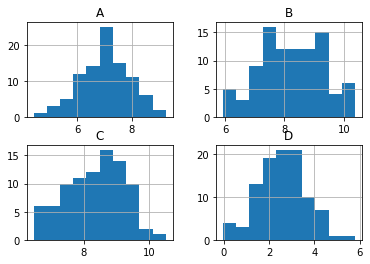

In [49]:
df.hist();

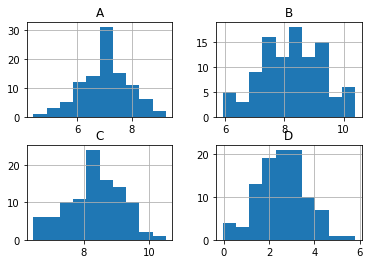

In [50]:
dfm.hist();

In [51]:
s - dfm.std(ddof=0)

A    0.028197
B    0.032613
C    0.055885
D    0.000000
dtype: float64

### Sustitución por mediana

In [52]:
me = df.median()
me

A    7.117971
B    8.171052
C    8.446766
D    2.463897
dtype: float64

In [53]:
dfme=df.copy()
dfme.fillna(me, inplace=True)
dfme.head()

,A,B,C,D
0,6.532546,9.549583,8.446766,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,8.446766,3.976409
3,8.268089,8.171052,7.923330,3.154594
4,7.260166,8.171052,8.830825,3.591899


In [54]:
me - dfme.median()

A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64

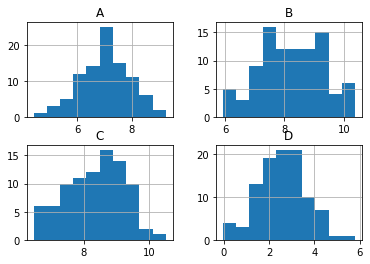

In [56]:
df.hist();

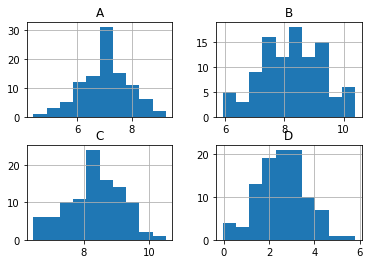

In [58]:
dfme.hist();

### Sustitución por moda

In [59]:
df.mode?

In [60]:
mo = df.mode().iloc[0]
mo

A    4.390174
B    5.921758
C    6.448799
D   -0.043129
Name: 0, dtype: float64

In [62]:
dfmo = df.copy()
dfmo.fillna(mo, inplace=True)
dfmo.head()

,A,B,C,D
0,6.532546,9.549583,6.448799,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,6.448799,3.976409
3,8.268089,5.921758,7.923330,3.154594
4,7.260166,5.921758,8.830825,3.591899


In [64]:
#el método que se debe evitar cuando la variable es númerica con datos perdidos es la moda
mo - df.mode()

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.580056,-0.009241,-0.080867,-0.298573
2,-0.892598,-0.103836,-0.201973,-0.523300
3,-0.954697,-0.322572,-0.333313,-0.560162
4,-0.996200,-0.336917,-0.380531,-0.689382
...,...,...,...,...
95,NaN,NaN,NaN,-4.494726
96,NaN,NaN,NaN,-4.533368
97,NaN,NaN,NaN,-4.607000
98,NaN,NaN,NaN,-4.815676


### Sustitución aleatoria

In [68]:
df

,A,B,C,D
0,6.532546,9.549583,NaN,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,NaN,3.976409
3,8.268089,NaN,7.923330,3.154594
4,7.260166,NaN,8.830825,3.591899
...,...,...,...,...
95,8.418329,9.063539,9.675768,2.233205
96,6.241706,8.923434,8.632555,4.563871
97,NaN,7.504447,8.851266,2.358825
98,6.570675,7.387592,9.460362,1.974308


In [65]:
df['A'].shape

(100,)

In [67]:
# Obtenemos un valor desde un índice aleatorio de la misma dimensión que la variable
dim = df['A'].shape[0]
i = np.random.randint(dim)
v = df['A'][i]
i,v

(29, 7.704439712798573)

In [69]:
# Para evitar sustituir NaNs en los valores perdidos, omitimos los valores perdidos en la variable
dim = df['A'].dropna().shape[0]
dim

94

In [72]:
i = np.random.randint(dim)
v = df['A'].dropna().iloc[i]
i,v

(87, 7.606805021712573)

In [73]:
nanA = np.where(df['A'].isna())[0]
nanA

array([17, 20, 47, 66, 76, 97], dtype=int64)

In [74]:
dim = df['A'].dropna().shape[0]
i = np.random.randint(dim, size=len(nanA))
i,dim

(array([ 0,  0, 84, 32, 58, 85]), 94)

In [75]:
dfa = df.copy()
dfa['A'].loc[nanA]=df['A'].dropna().iloc[i].values


In [77]:
dfa['A'].isna().sum()

0

In [78]:
#El método de imputación preferible si la variable es estrictamente aleatoria es una imp. aleatoria
dfcopy = df.copy()
for c in df.columns:
    nan = np.where(df[c].isna())[0]
    dim = df[c].dropna().shape[0]
    i=np.random.randint(dim, size=len(nan))
    dfcopy[c].loc[nan] = df[c].dropna().iloc[i].values
    

In [79]:
#Dataframe con sustitución aleatoria
dfcopy

,A,B,C,D
0,6.532546,9.549583,7.843204,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,8.509086,3.976409
3,8.268089,8.131832,7.923330,3.154594
4,7.260166,7.072520,8.830825,3.591899
...,...,...,...,...
95,8.418329,9.063539,9.675768,2.233205
96,6.241706,8.923434,8.632555,4.563871
97,8.574986,7.504447,8.851266,2.358825
98,6.570675,7.387592,9.460362,1.974308


In [80]:
dfcopy.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64

# Imputación usando clases

In [81]:
from sklearn.impute import SimpleImputer

In [83]:
imp=SimpleImputer() # Imputación por media
data=imp.fit_transform(df)
data

array([[ 6.53254635,  9.5495834 ,  8.35842923,  1.53205181],
       [ 6.9834316 ,  9.25816369,  9.59497833,  2.99916316],
       [ 6.23999357,  9.3966202 ,  8.35842923,  3.97640884],
       [ 8.26808949,  8.2091554 ,  7.92332967,  3.15459384],
       [ 7.26016598,  8.2091554 ,  8.83082452,  3.59189928],
       [ 7.15490954,  8.05492558,  9.30071592,  1.91063458],
       [ 7.13056409,  9.88787884,  8.35842923,  3.23067943],
       [ 7.6798734 ,  8.2091554 ,  8.35842923,  3.73567792],
       [ 6.87165888, 10.0386428 ,  7.86396921,  2.3090245 ],
       [ 7.51803629,  8.19011966,  8.75690564,  3.20841501],
       [ 7.51698831,  9.40294432,  8.22441367,  1.75835118],
       [ 8.00947881,  9.07883799,  7.8432039 ,  2.40810173],
       [ 7.16427166,  7.02772848,  8.7396222 ,  4.45159707],
       [ 7.67232992,  7.52353043,  8.3090064 ,  1.48944606],
       [ 6.5501579 ,  7.02438038,  8.41963049,  3.14076065],
       [ 7.11632627,  9.64208575,  7.12022646,  2.43492632],
       [ 5.90539613,  8.

In [84]:
pd.DataFrame(data, columns=df.columns)

,A,B,C,D
0,6.532546,9.549583,8.358429,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,8.358429,3.976409
3,8.268089,8.209155,7.923330,3.154594
4,7.260166,8.209155,8.830825,3.591899
...,...,...,...,...
95,8.418329,9.063539,9.675768,2.233205
96,6.241706,8.923434,8.632555,4.563871
97,7.041854,7.504447,8.851266,2.358825
98,6.570675,7.387592,9.460362,1.974308


In [85]:
imp = SimpleImputer(strategy = 'median')
pd.DataFrame(imp.fit_transform(df), columns=df.columns)


,A,B,C,D
0,6.532546,9.549583,8.446766,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,8.446766,3.976409
3,8.268089,8.171052,7.923330,3.154594
4,7.260166,8.171052,8.830825,3.591899
...,...,...,...,...
95,8.418329,9.063539,9.675768,2.233205
96,6.241706,8.923434,8.632555,4.563871
97,7.117971,7.504447,8.851266,2.358825
98,6.570675,7.387592,9.460362,1.974308


In [86]:
# Regresa unicamente la variable 'A' imputada
imp.fit_transform(df[['A']])

array([[6.53254635],
       [6.9834316 ],
       [6.23999357],
       [8.26808949],
       [7.26016598],
       [7.15490954],
       [7.13056409],
       [7.6798734 ],
       [6.87165888],
       [7.51803629],
       [7.51698831],
       [8.00947881],
       [7.16427166],
       [7.67232992],
       [6.5501579 ],
       [7.11632627],
       [5.90539613],
       [7.11797145],
       [6.41868251],
       [7.2766592 ],
       [7.11797145],
       [5.38637382],
       [7.12007323],
       [6.27956019],
       [5.90201149],
       [7.10486438],
       [8.31309043],
       [7.70536209],
       [9.25579346],
       [7.70443971],
       [8.11195856],
       [7.05229269],
       [6.98562443],
       [7.26296054],
       [7.78732418],
       [5.3448708 ],
       [6.35125374],
       [7.11961664],
       [7.104233  ],
       [8.54968669],
       [9.21982407],
       [6.15146113],
       [7.75947231],
       [6.02006826],
       [7.24405841],
       [6.49574278],
       [7.19026238],
       [7.117

In [87]:
# Asignando diferentes estrategias para cada variable
d = {'A': df['A'].mean(),
     'B': df['B'].median(),
     'C': df['C'].mode()[0]}
dfcopy = df.copy()
dfcopy.fillna(d, inplace=True)
dfcopy.head()

,A,B,C,D
0,6.532546,9.549583,6.448799,1.532052
1,6.983432,9.258164,9.594978,2.999163
2,6.239994,9.396620,6.448799,3.976409
3,8.268089,8.171052,7.923330,3.154594
4,7.260166,8.171052,8.830825,3.591899


# Valores extremos

In [89]:
df.iloc[3,0] = 150
df.iloc[10:15,1]=200
df.iloc[0:5,-1] =-200
df.head(15)

,A,B,C,D
0,6.532546,9.549583,NaN,-200.000000
1,6.983432,9.258164,9.594978,-200.000000
2,6.239994,9.396620,NaN,-200.000000
3,150.000000,NaN,7.923330,-200.000000
4,7.260166,NaN,8.830825,-200.000000
5,7.154910,8.054926,9.300716,1.910635
6,7.130564,9.887879,NaN,3.230679
7,7.679873,NaN,NaN,3.735678
8,6.871659,10.038643,7.863969,2.309025
9,7.518036,8.190120,8.756906,3.208415


In [90]:
Q = df.quantile([0.25,0.75])
iqr = Q.loc[0.75] - Q.loc[0.25]
Li = Q.loc[0.25] - 3*iqr
Ls = Q.loc[0.75] + 3*iqr


In [91]:
Li

A    2.697517
B    2.319904
C    3.674719
D   -2.571283
dtype: float64

In [92]:
Ls

A    11.448884
B    14.319407
C    13.087369
D     7.529488
dtype: float64

In [93]:
TF = (df<Li) | (df>Ls)
TF

,A,B,C,D
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,True,False,False,True
4,False,False,False,True
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [94]:
df[TF]=np.NaN
df.head()

,A,B,C,D
0,6.532546,9.549583,NaN,NaN
1,6.983432,9.258164,9.594978,NaN
2,6.239994,9.396620,NaN,NaN
3,NaN,NaN,7.923330,NaN
4,7.260166,NaN,8.830825,NaN


In [95]:
# 'A': media
# 'B': mediana
# 'C': moda
d = {'A': df['A'].mean(),
     'B': df['B'].median(),
     'C': df['C'].mode()[0]}
d

{'A': 7.028669045192955, 'B': 8.181840977503613, 'C': 6.448798871658838}

In [96]:
df.fillna(d, inplace=True)

In [97]:
df

,A,B,C,D
0,6.532546,9.549583,6.448799,NaN
1,6.983432,9.258164,9.594978,NaN
2,6.239994,9.396620,6.448799,NaN
3,7.028669,8.181841,7.923330,NaN
4,7.260166,8.181841,8.830825,NaN
...,...,...,...,...
95,8.418329,9.063539,9.675768,2.233205
96,6.241706,8.923434,8.632555,4.563871
97,7.028669,7.504447,8.851266,2.358825
98,6.570675,7.387592,9.460362,1.974308


In [99]:
!pip install feature-engine

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-1.0.1.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.




  Using cached feature_engine-1.6.2-py2.py3-none-any.whl (328 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:


In [100]:
from feature_engine.imputation import RandomSampleImputer

ModuleNotFoundError: No module named 'feature_engine'

In [ ]:
# 'D' -> Sustitución aleatoria
imp = RandomSamplerImputer(['D'])
df1 = imp.fit_transform(df)
df1

In [ ]:
df1.isna().sum()

#### Si una variable es categórica y tiene valores perdidos la imputación preferible es una imp. por moda o aleatoria del conjunto de categorías